Please upload the Student Performance Factors dataset (CSV file)


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (2).csv
Dataset loaded successfully!
Shape of dataset: (6607, 20)

Column names in dataset:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

Using 'Hours_Studied' as Study Hours column
Using 'Previous_Scores' as Exam Score column

Checking for missing values...
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              

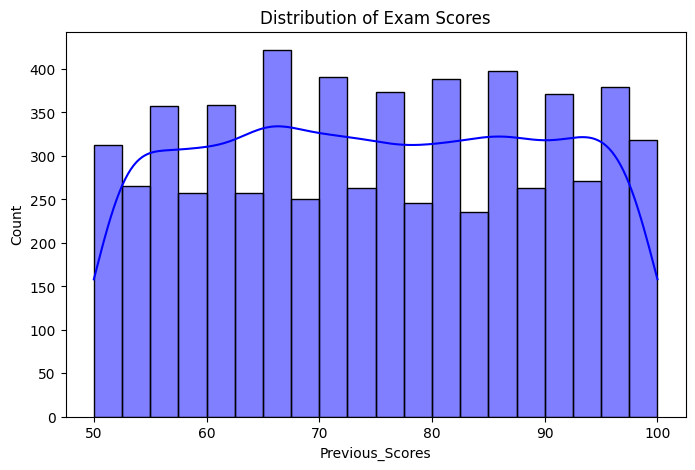

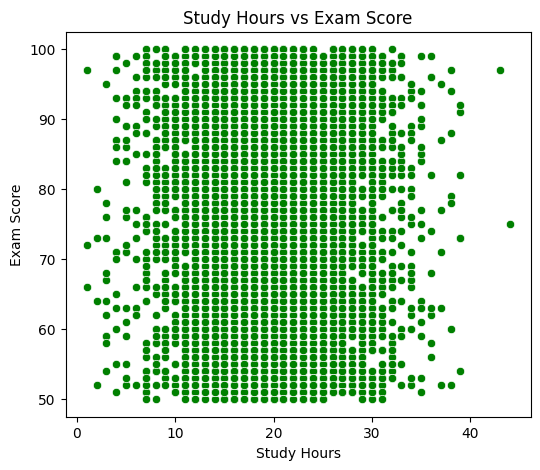


Linear Regression Performance:
MAE  : 12.36
MSE  : 203.93
RMSE : 14.28
R² Score : 0.00


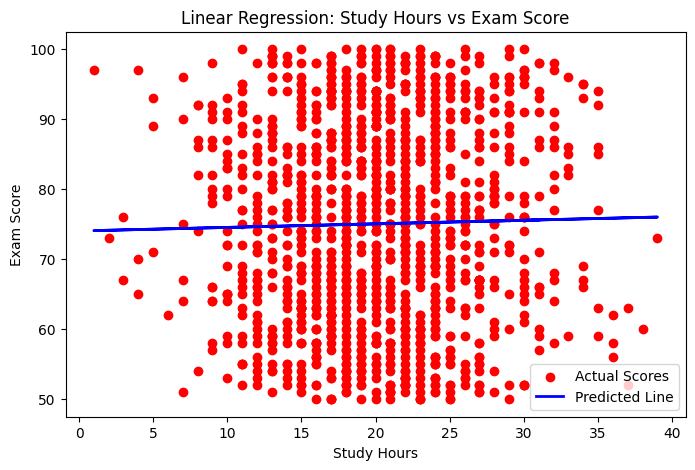


Polynomial Regression (Degree=2) Performance:
MAE  : 12.36
MSE  : 203.74
RMSE : 14.27
R² Score : 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


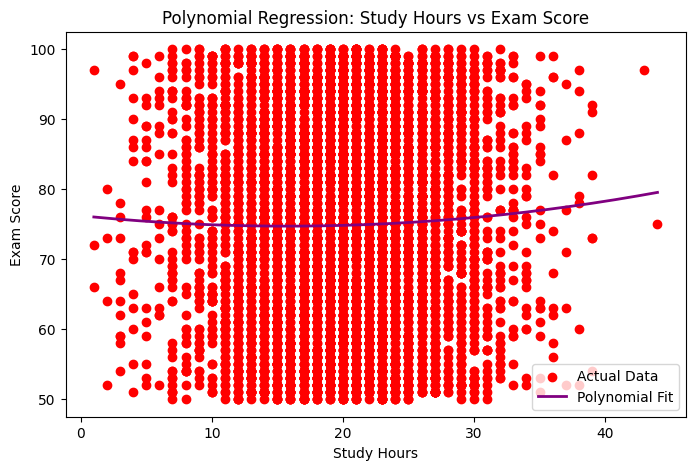

In [3]:
# ------------------------------
# Student Score Prediction Task
# ------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Upload dataset
print("Please upload the Student Performance Factors dataset (CSV file)")
uploaded = files.upload()

# Get uploaded filename
filename = list(uploaded.keys())[0]

# Step 3: Load dataset
df = pd.read_csv(filename)
print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)

print("\nColumn names in dataset:")
print(list(df.columns))

# ------------------------------
# Step 4: Auto-detect important columns
# ------------------------------
def find_column(columns, keywords):
    """Find column name containing one of the keywords (case-insensitive)."""
    for col in columns:
        for kw in keywords:
            if re.search(kw, col, re.IGNORECASE):
                return col
    return None

study_col = find_column(df.columns, ["study", "hours"])
score_col = find_column(df.columns, ["score", "exam", "marks", "grade"])

if not study_col or not score_col:
    raise ValueError("Could not detect study hours or exam score columns. Please rename them in the dataset!")

print(f"\nUsing '{study_col}' as Study Hours column")
print(f"Using '{score_col}' as Exam Score column")

# Step 5: Basic Info & Cleaning
print("\nChecking for missing values...")
print(df.isnull().sum())
df = df.dropna()

# Step 6: Basic Visualization
plt.figure(figsize=(8,5))
sns.histplot(df[score_col], kde=True, bins=20, color="blue")
plt.title("Distribution of Exam Scores")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x=df[study_col], y=df[score_col], color="green")
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

# Step 7: Features and Target
X = df[[study_col]]   # Independent variable
y = df[score_col]     # Target variable

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 10: Predictions
y_pred = lin_reg.predict(X_test)

# Step 11: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.2f}")

# Step 12: Visualization of Predictions
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="red", label="Actual Scores")
plt.plot(X_test, y_pred, color="blue", linewidth=2, label="Predicted Line")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Study Hours vs Exam Score")
plt.legend()
plt.show()

# ------------------------------
# Bonus: Polynomial Regression
# ------------------------------

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train_p, y_train_p)

# Predictions
y_pred_poly = poly_reg.predict(X_test_p)

# Evaluation
mae_poly = mean_absolute_error(y_test_p, y_pred_poly)
mse_poly = mean_squared_error(y_test_p, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_p, y_pred_poly)

print("\nPolynomial Regression (Degree=2) Performance:")
print(f"MAE  : {mae_poly:.2f}")
print(f"MSE  : {mse_poly:.2f}")
print(f"RMSE : {rmse_poly:.2f}")
print(f"R² Score : {r2_poly:.2f}")

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="red", label="Actual Data")
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
plt.plot(X_range, poly_reg.predict(poly.transform(X_range)), color="purple", linewidth=2, label="Polynomial Fit")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression: Study Hours vs Exam Score")
plt.legend()
plt.show()
